<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/examples/multi_modal/openai_multi_modal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal LLM using OpenAI GPT-4V model for image reasoning

In this notebook, we show how to use OpenAI GPT4V MultiModal LLM class/abstraction for image understanding/reasoning.

We also show several functions we are now supporting for OpenAI GPT4V LLM:
* `complete` (both sync and async): for a single prompt and list of images
* `chat` (both sync and async): for multiple chat messages
* `stream complete` (both sync and async): for steaming output of complete
* `stream chat` (both sync and async): for steaming output of chat

In [ ]:
!pip install openai matplotlib

##  Use GPT4V to understand Images from URLs

In [ ]:
import os

OPENAI_API_TOKEN = "sk-"  # Your OpenAI API token here
os.environ["OPENAI_API_TOKEN"] = OPENAI_API_TOKEN

## Initialize `OpenAIMultiModal` and Load Images from URLs

##

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal

from llama_index.multi_modal_llms.generic_utils import (
    load_image_urls,
)


image_urls = [
    "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    # "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    # "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    # "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]

image_documents = load_image_urls(image_urls)

openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=300
)

https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg


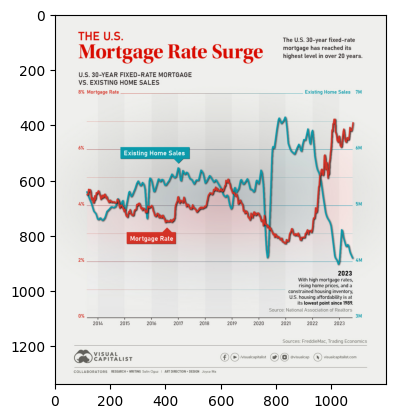

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Complete a prompt with a bunch of images

In [ ]:
complete_response = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
print(complete_response)

The image depicts a graph showing the surge in U.S. mortgage rates from January 2021 to September 2023. The graph illustrates a steep upward trend in the rates over the period, with significant spikes and fluctuations.


### Steam Complete a prompt with a bunch of images

In [ ]:
stream_complete_response = openai_mm_llm.stream_complete(
    prompt="give me more context for this image",
    image_documents=image_documents,
)

In [ ]:
for r in stream_complete_response:
    print(r.delta, end="")

This image appears to be a chart or infographic from the website Visual Capitalist, which is known for creating visual content on business and economic topics. The title "US_Mortgage_Rate_Surge" suggests that the image is illustrating the recent increase in mortgage rates in the United States. The date in the file name "Sept-11" could indicate that the data represented in the image is from around September 11, 2023. To provide more context, one would need to view the image and possibly the accompanying article or data source to understand the trends, reasons behind the surge, and its potential impact on the housing market and the overall economy.

### Chat through a list of chat messages

In [ ]:
from llama_index.multi_modal_llms.openai_utils import (
    generate_openai_multi_modal_chat_message,
)

chat_msg_1 = generate_openai_multi_modal_chat_message(
    prompt="Describe the images as an alternative text",
    role="user",
    image_documents=image_documents,
)

chat_msg_2 = generate_openai_multi_modal_chat_message(
    prompt="The image is a graph showing the surge in US mortgage rates. It is a visual representation of data, with a title at the top and labels for the x and y-axes. Unfortunately, without seeing the image, I cannot provide specific details about the data or the exact design of the graph.",
    role="assistant",
)

chat_msg_3 = generate_openai_multi_modal_chat_message(
    prompt="can I know more?",
    role="user",
)

chat_messages = [chat_msg_1, chat_msg_2, chat_msg_3]
chat_response = openai_mm_llm.chat(
    # prompt="Describe the images as an alternative text",
    messages=chat_messages,
)

In [ ]:
for msg in chat_messages:
    print(msg.role, msg.content)

MessageRole.USER [{'type': 'text', 'text': 'Describe the images as an alternative text'}, {'type': 'image_url', 'image_url': 'https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg'}]
MessageRole.ASSISTANT The image is a graph showing the surge in US mortgage rates. It is a visual representation of data, with a title at the top and labels for the x and y-axes. Unfortunately, without seeing the image, I cannot provide specific details about the data or the exact design of the graph.
MessageRole.USER can I know more?


In [ ]:
print(chat_response)

assistant: As an AI, I cannot physically see images or access the content of external URLs, so I can only provide a general description based on the information provided. 

The image URL indicates that it is a graph related to the US mortgage rate surge, most likely detailing the increase in mortgage rates over a certain period. The graph might show a line or bar chart representing the changes over time, possibly with annotations or markers indicating significant events or points in time that affected the rates.

Typically, such graphs would have an x-axis (horizontal) that represents time, such as months or years, and a y-axis (vertical) indicating the mortgage rate percentage. There may be a key or legend describing different lines or colors if multiple data sets are presented.

As for alternative text, it could be something like: "Graph illustrating the significant surge in US mortgage rates over time, with detailed labels marking specific data points and trends."


### Stream Chat through a list of chat messages

In [ ]:
stream_chat_response = openai_mm_llm.stream_chat(
    # prompt="Describe the images as an alternative text",
    messages=chat_messages,
)

In [ ]:
for r in stream_chat_response:
    print(r.delta, end="")

As I cannot view images, I can only provide a general description based on the URL provided. 

The image appears to be a chart or graph from the Visual Capitalist website related to the surge in US mortgage rates as of September 11. The graph likely displays the change in mortgage rates over time, showcasing an upward trend given the word "surge" in the URL. There may be various lines or bars representing different time periods, interest rates, or other financial data. The graph would typically include an x-axis showing the timeline and a y-axis showing the mortgage rate percentages. There may also be text annotations or a legend explaining specific points or trends in the data. Without seeing the actual image, this description is speculative and based on the context provided by the URL.

### Async Complete

In [ ]:
response_acomplete = await openai_mm_llm.acomplete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
print(response_acomplete)

The image is a graph that displays the surge in US mortgage rates from September 11th. The graph shows an upward trend with data points representing the increasing rates over time. The background is blue with white text and grid lines.


### Async Steam Complete

In [ ]:
response_astream_complete = await openai_mm_llm.astream_complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

In [ ]:
async for delta in response_astream_complete:
    print(delta.delta, end="")

The image depicts a graph charting the surge in US mortgage rates from January 2021 to September 2021. It is a line graph with a sharp upward trajectory, illustrating the rapid increase in rates over the course of several months. The background is white with the graph lines in shades of blue and red, and there is text and numerical data providing further context to the information being presented.

### Async Chat

In [ ]:
achat_response = await openai_mm_llm.achat(
    messages=chat_messages,
)

In [ ]:
print(achat_response)

assistant: Certainly! Based on the URL provided, which mentions "US_Mortgage_Rate_Surge," it's likely that the image contains a chart or graph illustrating the increase in mortgage rates in the United States. The graph could be showing a timeline on the x-axis, with the corresponding mortgage rates on the y-axis, indicating how much they have risen over a specific period. There may be a line or bars indicating the rate changes, possibly with different colors or annotations to highlight significant points or trends. There could also be text elements providing context, such as the scale of rates, percentage increases, or comparison to historical rates. Without seeing the image, I can't provide exact details, but this should give an idea of what the image represents based on the URL and the description provided.


### Async stream Chat

In [ ]:
astream_chat_response = await openai_mm_llm.astream_chat(
    messages=chat_messages,
)

In [ ]:
async for delta in astream_chat_response:
    print(delta.delta, end="")

Certainly! As an AI language model, I do not have the capability to 'see' images in the way humans do, so I am unable to describe specific visual details or data directly from the image provided. However, I can offer some general information based on the URL text you provided.

The image seems to be associated with an article or a report from Visual Capitalist, a website known for its data-driven visual content, and is likely a graphical representation of how the US mortgage rates have increased as of the date mentioned in the URL, which appears to be September 11th.

Typically, such a graph would show a timeline on the horizontal axis (x-axis), possibly spanning months or years, and the mortgage rates percentage on the vertical axis (y-axis). The lines or bars on the graph would illustrate the changes and trends in mortgage rates over the specified time period, perhaps highlighting a significant rise or depicting historical context for current rates.

For more detailed information, yo

## Complete with Two images

In [ ]:
image_urls = [
    "https://www.visualcapitalist.com/wp-content/uploads/2023/10/US_Mortgage_Rate_Surge-Sept-11-1.jpg",
    "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    # "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    # "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]

image_documents_1 = load_image_urls(image_urls)

response_multi = openai_mm_llm.complete(
    prompt="is there any relationship between those images?",
    image_documents=image_documents_1,
)
print(response_multi)

Based on the provided images, it is difficult to establish a direct relationship as they depict different subjects. The first image URL leads to a visual representation of the surge in U.S. mortgage rates, which is a financial and economic topic. The second image URL is from Sportsnet, which typically covers sports-related content, indicating that the image may be related to a sports event or news.

Without further context or information about the intent behind the query or the specific content of the images, any relationship would be speculative. If the question refers to a thematic, conceptual, or contextual relationship, more information would be necessary to make an accurate assessment.


##  Use GPT4V to understand images from local files

In [ ]:
from llama_index import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./images_wiki").load_data()

response = openai_mm_llm.complete(
    prompt="Describe the images as an alternative text",
    image_documents=image_documents,
)

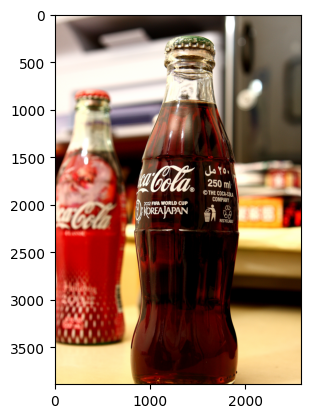

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("./images_wiki/3.jpg")
plt.imshow(img)

In [ ]:
print(response)

You are looking at a close-up image of a glass Coca-Cola bottle. The label on the bottle features the iconic Coca-Cola logo with additional text underneath it commemorating the 2002 FIFA World Cup hosted by Korea/Japan. The label also indicates that the bottle contains 250 ml of the product. In the background with a shallow depth of field, you can see the blurred image of another Coca-Cola bottle, emphasizing the focus on the one in the foreground. The overall lighting and detail provide a clear view of the bottle and its labeling.
